# CS 512 F24: Assignment 1

Due by 9/22/2024

**Name:** Tamilarasee Sethuraj

**Student ID:** A20553416



1. **Homogeneous Coordinates Representation (2D):** Let x =  (2,3) be a pointin 2D Cartesian coordinates. 

    Convert the point x into homogeneous coordinates xH 

    Find another point in 2D homogeneous coordinates that is equivalent to the same polint x (use a different scale). 
   
    Convert both homogeneous coordinates back to Cartesian coordinates and verify they represent the same point.

In [13]:

import numpy as np
x = np.array([2, 3])
print("2D cartesian coordinates:", x)

def get_homogenous_coordinates(cartesian, scale=1):
    homogenous = np.append(cartesian, 1) * scale    
    return homogenous

def get_cartesian_coordinates(homogenous):
    cartesian = homogenous / homogenous[-1]
    cartesian = cartesian[:-1]
    return cartesian


xH1 = get_homogenous_coordinates(x,1)
print('2D homogenous point (xH1): ',xH1)

scale = 5
xH2 = get_homogenous_coordinates(x,scale)
print(f"2D homogenous point with (a different) scale = 5 (xH2): {xH2}")


x1 = get_cartesian_coordinates(xH1)
print('2D point from xH1: ',x1)


x2 = get_cartesian_coordinates(xH2)
print(f"2D point from xH2: {x2}")

if np.allclose(x1,x) and np.allclose(x2,x):
    print("x1 and x2 represent the same point x -", x)
else:
    print("x1 and x2 are not the same as x")

2D cartesian coordinates: [2 3]
2D homogenous point (xH1):  [2 3 1]
2D homogenous point with (a different) scale = 5 (xH2): [10 15  5]
2D point from xH1:  [2. 3.]
2D point from xH2: [2. 3.]
x1 and x2 represent the same point x - [2 3]


2. **Homogeneous Coordinates Representation (3D):** Let y = (4, 5, 6) be a point in 3D Cartesian coordinates. 

Convert y to its homogeneous coordinates representation. 

Now, consider the homogeneous point yH = (4, 5,6, 1), Scale it by a factor of 2 and convert back to Cartesian coordinates 

Verify the result matches the original point y.

In [14]:
y = np.array([4, 5, 6])
print("3D cartesian coordinates:", y)

yH1 = get_homogenous_coordinates(y,1)
print('3D homogenous point (yH1): ',yH1)

scale = 2
yH2 = get_homogenous_coordinates(y,scale)
print(f"3D homogenous point with a scale = 2, yH2: {yH2}")

y2 = get_cartesian_coordinates(yH2)
print(f"3D cartesian point from yH2: {y2}")

if np.allclose(y2,y):
    print("y and y2 represent the same point  -", y)
else:
    print("y and y2 are not the same")

3D cartesian coordinates: [4 5 6]
3D homogenous point (yH1):  [4 5 6 1]
3D homogenous point with a scale = 2, yH2: [ 8 10 12  2]
3D cartesian point from yH2: [4. 5. 6.]
y and y2 represent the same point  - [4 5 6]


**3. Affine Transformations in 2D:** Given a point p = (1,2) in 2D, apply the following transformations in the specified order.:


a. Scale by a factor of 3. 

b. Rotate counterclockwise by 45°. 

c. Translate by (2,3). 

Compute the transformation matrix in homogeneous coordinates for each step. Then, apply the combined transformation to the point p. Finally. verify your result by applying the transformations using NumPy.


In [15]:
p = np.array([1, 2])
print("2D cartesian coordinates:", p)

pH1 = get_homogenous_coordinates(p)
print('2D homogenous point (pH1): ',pH1)

def get_scale_matrix(scale):
    scale_matrix = np.array([
        [scale, 0, 0],
        [0, scale, 0],
        [0, 0, 1]])    
    return scale_matrix

def get_rotation_matrix(angle_degrees):
    angle_radians = np.deg2rad(angle_degrees)
    rotation_matrix = np.array([
        [np.cos(angle_radians), -np.sin(angle_radians), 0],
        [np.sin(angle_radians), np.cos(angle_radians), 0],
        [0,0,1]])    
    return rotation_matrix


def get_translation_matrix(point):
    translation_matrix = np.array([
        [1, 0, point[0]],
        [0, 1, point[1]],
        [0, 0, 1]])   
    return translation_matrix


# Transform step by step
scale_matrix = get_scale_matrix(3)
print("\nScale matrix\n", scale_matrix)
scaled_2DH = scale_matrix @ pH1
print("\nScaled homogenous coordinates: ", scaled_2DH)

rotation_matrix = get_rotation_matrix(45)
print("\nRotation matrix\n", rotation_matrix)
rotated_2DH = rotation_matrix @ scaled_2DH
print("\nScaled & Rotated homogenous coordinates: ", rotated_2DH)

translation_point = np.array([2,3])
translation_matrix = get_translation_matrix(translation_point)
print("\nTranslation matrix\n", translation_matrix)
translated_2DH = translation_matrix @ rotated_2DH
print("\nScaled, Rotated and Translated homogenous coordinates in step by step method: ")
print("2DH : ", translated_2DH)
print("2D : ", get_cartesian_coordinates(translated_2DH))





2D cartesian coordinates: [1 2]
2D homogenous point (pH1):  [1 2 1]

Scale matrix
 [[3 0 0]
 [0 3 0]
 [0 0 1]]

Scaled homogenous coordinates:  [3 6 1]

Rotation matrix
 [[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]

Scaled & Rotated homogenous coordinates:  [-2.12132034  6.36396103  1.        ]

Translation matrix
 [[1 0 2]
 [0 1 3]
 [0 0 1]]

Scaled, Rotated and Translated homogenous coordinates in step by step method: 
2DH :  [-0.12132034  9.36396103  1.        ]
2D :  [-0.12132034  9.36396103]


In [16]:
# Compute combined transformation and then apply to point
combined_R_S = rotation_matrix @ scale_matrix
print("Combined transformation matrix for scaling + rotation\n", combined_R_S)
combined_transformation_matrix = translation_matrix @ combined_R_S
print("Combined transformation matrix (TRS)\n", combined_transformation_matrix)
transformed_point = combined_transformation_matrix @ pH1
print("\nFinal transformed point through affine transformation: ")
print("2DH: ",transformed_point)
print("2D: ", get_cartesian_coordinates(transformed_point))

Combined transformation matrix for scaling + rotation
 [[ 2.12132034 -2.12132034  0.        ]
 [ 2.12132034  2.12132034  0.        ]
 [ 0.          0.          1.        ]]
Combined transformation matrix (TRS)
 [[ 2.12132034 -2.12132034  2.        ]
 [ 2.12132034  2.12132034  3.        ]
 [ 0.          0.          1.        ]]

Final transformed point through affine transformation: 
2DH:  [-0.12132034  9.36396103  1.        ]
2D:  [-0.12132034  9.36396103]


**4. Inverse Transformations (2D):** Let q = (3,4) be a point in 2D, and assume the following transformations have been applied: 

 1. Scale by 2.
 2. Rotate by 30". 
 3. Translate by (5,5). 

Compute the matrix that reverses these transformations. Apply the inverse matrix to return q to its original position. Verify the result using NumPy.

In [17]:
q = np.array([3, 4])
print("2D cartesian coordinates:", q)

qH1 = get_homogenous_coordinates(q)
print('2D homogenous point (pH1): ',qH1)

def get_scale_matrix_2DH(scale):
    scale_matrix = np.array([
        [scale, 0, 0],
        [0, scale, 0],
        [0, 0, 1]])    
    return scale_matrix

def get_rotation_matrix_2DH(angle_degrees):
    angle_radians = np.deg2rad(angle_degrees)
    rotation_matrix = np.array([
        [np.cos(angle_radians), -np.sin(angle_radians), 0],
        [np.sin(angle_radians), np.cos(angle_radians), 0],
        [0,0,1]])    
    return rotation_matrix


def get_translation_matrix_2DH(point):
    translation_matrix = np.array([
        [1, 0, point[0]],
        [0, 1, point[1]],
        [0, 0, 1]])   
    return translation_matrix



scale_matrix = get_scale_matrix_2DH(2)
scale_inv = np.linalg.inv(scale_matrix)
print("Inverse scale matrix:\n",scale_inv)

rotation_matrix = get_rotation_matrix_2DH(30)
rot_inv = np.linalg.inv(rotation_matrix)
print("Inverse rotation matrix:\n",rot_inv)

translation_point = np.array([5,5])
translation_matrix = get_translation_matrix_2DH(translation_point)
trans_inv = np.linalg.inv(translation_matrix)
print("Inverse Translation matrix:\n",trans_inv)



2D cartesian coordinates: [3 4]
2D homogenous point (pH1):  [3 4 1]
Inverse scale matrix:
 [[0.5 0.  0. ]
 [0.  0.5 0. ]
 [0.  0.  1. ]]
Inverse rotation matrix:
 [[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]
Inverse Translation matrix:
 [[ 1.  0. -5.]
 [ 0.  1. -5.]
 [ 0.  0.  1.]]


To reverse these transformations, we will have to apply the inverse matrices in the reverse order so that the last transformation is reversed first.

Transformation matrix for Reversal = $S^{-1}R^{-1}T^{-1}$

In [18]:

# Reverse the Transformation step by step
print("\nInverse transformation - step by step method: \n")
before_translation_2DH = trans_inv @ qH1
print("2DH point after reversing the translation:", before_translation_2DH)
before_rotation_2DH = rot_inv @ before_translation_2DH
print("2DH point after reversing the translation and rotaion:", before_rotation_2DH)
original_point_2DH = scale_inv @ before_rotation_2DH
print("\nOriginal point - Afer reversal of translation, rotation and scaling")
print("2DH: ", original_point_2DH)
original_point_2D = get_cartesian_coordinates(original_point_2DH)
print("2D: ", original_point_2D)

# Compute combined transformation and then apply to point
print("\nInverse transformation through combined transformation matrix: ")
combined_R_T = rot_inv @ trans_inv
print("\nCombined transformation matrix for rotation + translation\n", combined_R_T)
combined_transformation_matrix = scale_inv @ combined_R_T
print("Final Combined transformation matrix for reversal (SRT)\n", combined_transformation_matrix)
original_point_2DH_q = combined_transformation_matrix @ qH1
print("\nOriginal point - Afer reversal of translation, rotation and scaling")
print("2DH:",original_point_2DH_q)
original_point_2D_q = get_cartesian_coordinates(original_point_2DH_q)
print("2D ", original_point_2D_q)


Inverse transformation - step by step method: 

2DH point after reversing the translation: [-2. -1.  1.]
2DH point after reversing the translation and rotaion: [-2.23205081  0.1339746   1.        ]

Original point - Afer reversal of translation, rotation and scaling
2DH:  [-1.1160254  0.0669873  1.       ]
2D:  [-1.1160254  0.0669873]

Inverse transformation through combined transformation matrix: 

Combined transformation matrix for rotation + translation
 [[ 0.8660254   0.5        -6.83012702]
 [-0.5         0.8660254  -1.83012702]
 [ 0.          0.          1.        ]]
Final Combined transformation matrix for reversal (SRT)
 [[ 0.4330127   0.25       -3.41506351]
 [-0.25        0.4330127  -0.91506351]
 [ 0.          0.          1.        ]]

Original point - Afer reversal of translation, rotation and scaling
2DH: [-1.1160254  0.0669873  1.       ]
2D  [-1.1160254  0.0669873]


 **5.Transformations Between 3D Coordinate Systems:** Consider two 3D coordinate systems:
 
 1. System A has its origin at (1, 1, 1) and is aligned with the world axes
 2. System B has its origin at (2, 2,2) and is rotated by 90" around the Z-axis
 
 A point r =(3,3, 3) s given in System A. Compute the transformation matrix to convert this point to Systemn B's coordinates and apply it to r

$$p^{(A)} = M_{(A \leftarrow w)} p^{(w)}$$
$$p^{(B)} = M_{(B \leftarrow w)} p^{(w)}$$
$$p^{(B)} = M_{(B \leftarrow w)} {M_{(A \leftarrow w)}}^{-1} p^{(A)}$$
$$= M_{(B \leftarrow w)} {M_{(w \leftarrow A)}} p^{(A)}$$
$$= (T(t_B)R_z) ^ {-1} {M_{(w \leftarrow A)}} p^{(A)}$$
$$=  {R_z}^{-1} T^{-1}(t_B) {M_{(w \leftarrow A)}} p^{(A)}$$
$$=  {R_z}^{-1} T^{-1}(t_B) T(t_A)p^{(A)}$$



In [19]:
Trans_A = np.array([1,1,1])
Trans_B = np.array([2,2,2])
Rot_Bz = 90
r_pA = np.array([3,3,3])

def get_rotation_matrix_z_3DH(angle_degrees):
    angle_radians = np.deg2rad(angle_degrees)
    rotation_matrix = np.array([
        [np.cos(angle_radians), -np.sin(angle_radians), 0, 0],
        [np.sin(angle_radians), np.cos(angle_radians), 0, 0],
        [0,0,1,0],
        [0,0,0,1]])    
    return rotation_matrix

def get_translation_matrix_3DH(point):
    translation_matrix = np.array([
        [1, 0, 0, point[0]],
        [0, 1, 0, point[1]],
        [0, 0, 1, point[2]],
        [0,0,0,1]])   
    return translation_matrix

Rot_Bz_inv = np.linalg.inv(get_rotation_matrix_z_3DH(Rot_Bz))
print("Inverse Rotation matrix w.r.t z axis\n",np.round(Rot_Bz_inv,3))
Trans_B_inv = np.linalg.inv(get_translation_matrix_3DH(Trans_B))
print("\nInverse B Translation matrix\n",Trans_B_inv)
Translation_A = get_translation_matrix_3DH(Trans_A)
print("\nTranslation matrix of A\n", Translation_A)
r_pAH = get_homogenous_coordinates(r_pA)

transformation_matrix_A_to_B = Rot_Bz_inv @ Trans_B_inv @ Translation_A
print("\nTranformation matrix to convert from System A to B:\n ", np.round(transformation_matrix_A_to_B,3))

r_pBH = transformation_matrix_A_to_B @ r_pAH
r_pB = get_cartesian_coordinates(r_pBH)
print("\nPoint r in system A: ",r_pA)
print("Point r in system B: ", r_pB)

Inverse Rotation matrix w.r.t z axis
 [[ 0.  1.  0.  0.]
 [-1.  0. -0. -0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]

Inverse B Translation matrix
 [[ 1.  0.  0. -2.]
 [ 0.  1.  0. -2.]
 [ 0.  0.  1. -2.]
 [ 0.  0.  0.  1.]]

Translation matrix of A
 [[1 0 0 1]
 [0 1 0 1]
 [0 0 1 1]
 [0 0 0 1]]

Tranformation matrix to convert from System A to B:
  [[ 0.  1.  0. -1.]
 [-1.  0.  0.  1.]
 [ 0.  0.  1. -1.]
 [ 0.  0.  0.  1.]]

Point r in system A:  [3 3 3]
Point r in system B:  [ 2. -2.  2.]


 **6.Projection in Camera Coordinates (3D to 2D):** Let a point in 3D camera coordinates be P =(1,2,5) You are given the  camera intrinsic matrix K. 

 1. Project the point P onto the 2D image plane using the intrinsic matrix K 
 2. Compute the 2D pixel coordinates of the projected point. 
 3. Explain the meaning or the elements of K.


$$p^{(i)} = K^*[I|0]P^{(c)}$$

In [20]:
P_cam = np.array([1,2,5])
K_star = np.array([
    [1000, 0, 500],
    [0,1000,500],
    [0,0,1]
])
I_0 = np.array([
    [1,0,0,0],
    [0,1,0,0],
    [0,0,1,0]
])

PH_cam = get_homogenous_coordinates(P_cam)

p_image = K_star @ I_0 @ PH_cam
print("2DH coordinates(Perspective projection) of image", p_image)
print("2D pixel coordinates:",get_cartesian_coordinates(p_image))

2DH coordinates(Perspective projection) of image [3500 4500    5]
2D pixel coordinates: [700. 900.]


**Elements of K**

The camera intrinsic matrix \( K \) is given by:

$$
K = \begin{bmatrix}
\alpha_u & 0 & u_0 \\
0 & \alpha_v & v_0 \\
0 & 0 & 1
\end{bmatrix}
$$

where:
- $\alpha_u = fk_u, \alpha_v = fk_v$ are the focal lengths in the x and y directions (in pixels) = 1000.
- f is the focal length
- $k_u , k_v$ represent the number of pixels/mm in x and y
- $u_0$ is the translation of the principal point in x (in pixels) = 500.
- $v_0$ is the translation of the principal point in y (in pixels) = 500.


**7.General Camera Model (3D World Points to 2D Image Points):** Given the following camera parameters:
1. Intrinsic matrix K
2. Camera rotation matrix R = identity matrix. 
3. Camera translation t = (0, 0, -10). 

Transform a 3D world point X = (2,3, 4) from world coordinates to 2D image coordinates. You will need to:

- Compute the extrinsic matrix from the rotation and translation 
- Project the point onto the image plane.
- Verify the 2D coordinates in pixels


$$p^{(i)} = K^*[R^*|T^*]P^{(w)}$$
$$where, R^* = R^T$$
$$T^* = -R^Tt$$


In [21]:
K_star = np.array([
    [1200,0,640],
    [0,1200,360],
    [0,0,1]
    ])
R = np.array([
    [1,0,0],
    [0,1,0],
    [0,0,1]
])
T = np.array([0,0,-10])
X = np.array([2,3,4])
XH = get_homogenous_coordinates(X)

R_star = R.T
T_star = -R.T @ T
Extrinsic_R_T = np.hstack((R_star, T_star.reshape(-1,1)))
print("Extrinsic matrix\n", Extrinsic_R_T)

xH_image = K_star @ Extrinsic_R_T @ XH
print("2DH coordinates (Projection of point in 2D image plane)", xH_image)
print("2D pixel coordinates:",get_cartesian_coordinates(xH_image))

Extrinsic matrix
 [[ 1  0  0  0]
 [ 0  1  0  0]
 [ 0  0  1 10]]
2DH coordinates (Projection of point in 2D image plane) [11360  8640    14]
2D pixel coordinates: [811.42857143 617.14285714]


**8. Image Transformation using cv2, warpaffine (2D):**
Load an image using OpenCV. You will apply a combination of transformations (translation, rotation, and scaling) to the image. 

1. First, compute the affine transformation matrix manually using translation (50,30), rotation by 30", and scaling by a factor of 1.5.
2. Use OpenCV's cv2.warpaffine function to apply the transformation to the image
3. Display both the original and transformed images.

Translation matrix
 [[ 1  0 50]
 [ 0  1 30]
 [ 0  0  1]]

Rotation matrix
 [[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]

Scale matrix
 [[1.5 0.  0. ]
 [0.  1.5 0. ]
 [0.  0.  1. ]]

Affine Matrix
 [[ 1.29903811  0.75       87.45190528]
 [-0.75        1.29903811  1.47114317]]


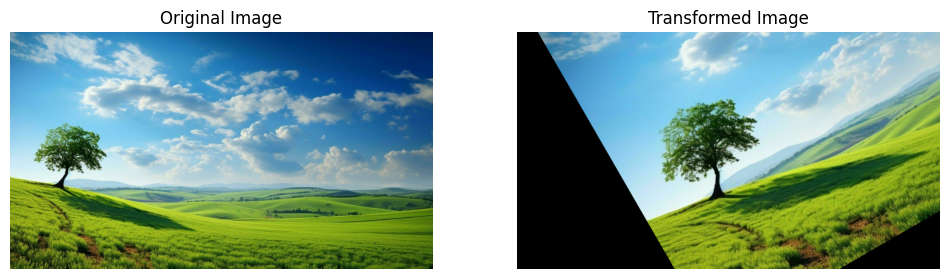

In [22]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread(r"tree.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
row, col, channel = image_rgb.shape


trans_point = np.array([50,30])
angle = -30
scale = 1.5


def get_scale_matrix_2D(scale):
    scale_matrix = np.array([
        [scale, 0, 0],
        [0, scale, 0],
        ])    
    return scale_matrix

def get_rotation_matrix_2D(angle_degrees):
    angle_radians = np.deg2rad(angle_degrees)
    rotation_matrix = np.array([
        [np.cos(angle_radians), -np.sin(angle_radians), 0],
        [np.sin(angle_radians), np.cos(angle_radians), 0],
        ])    
    return rotation_matrix


def get_translation_matrix_2D(point):
    translation_matrix = np.array([
        [1, 0, point[0]],
        [0, 1, point[1]],
        [0, 0, 1]])   
    return translation_matrix

translation_matrix = get_translation_matrix(trans_point)
print("Translation matrix\n",translation_matrix)
rotation_matrix = get_rotation_matrix(angle)
print("\nRotation matrix\n",rotation_matrix)
scale_matrix = get_scale_matrix(scale)
print("\nScale matrix\n",scale_matrix)

affine_transformation = scale_matrix @ rotation_matrix @ translation_matrix
print("\nAffine Matrix\n",affine_transformation[:2,:])

transformed_image = cv2.warpAffine(image_rgb, affine_transformation[:2,:], (col, row))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image)
plt.title("Transformed Image")
plt.axis('off')

plt.show()



 **9. Order of Transformations:** Let s = (1, 1) be a point in 2D. Apply the following transformations in the order specified 
 1. Rotate by 90 degree 
 2. Scale by a factor of 2
 3. Translate by (-1,1). 
 
 Now reverse the arder of the transformations and apply them again. Observe and explain, how the final position of s changes with different transformation orders.

In [23]:
s = np.array([1, 1])
print("2D cartesian coordinates:", s)

sH1 = get_homogenous_coordinates(s)
print('2D homogenous point (sH1): ',sH1)

def get_rotation_matrix(angle_degrees):
    angle_radians = np.deg2rad(angle_degrees)
    rotation_matrix = np.array([
        [np.cos(angle_radians), -np.sin(angle_radians), 0],
        [np.sin(angle_radians), np.cos(angle_radians), 0],
        [0,0,1]])    
    return rotation_matrix

def get_scale_matrix(scale):
    scale_matrix = np.array([
        [scale, 0, 0],
        [0, scale, 0],
        [0, 0, 1]])    
    return scale_matrix

def get_translation_matrix(point):
    translation_matrix = np.array([
        [1, 0, point[0]],
        [0, 1, point[1]],
        [0, 0, 1]])   
    return translation_matrix

print("\nCorrect Order:")
# Correct Order - Transform in order step by step 
rotation_matrix = get_rotation_matrix(90)
scale_matrix = get_scale_matrix(2)
translation_point = np.array([-1,1])
translation_matrix = get_translation_matrix(translation_point)

rotated_2DH = np.dot(rotation_matrix,sH1)
print("Rotated homogenous coordinates: ", rotated_2DH)

scaled_2DH = np.dot(scale_matrix,rotated_2DH)
print("Rotated and Scaled homogenous coordinates: ", scaled_2DH)

translated_2DH = np.dot(translation_matrix,scaled_2DH)
print("Rotated,Scaled and Translated homogenous coordinates in step by step method: ")
print("2DH : ", translated_2DH)
print("2D : ", get_cartesian_coordinates(translated_2DH))

# Correct order - Compute combined transformation and then apply to point
combined_transformation_matrix = np.dot(translation_matrix, np.dot(scale_matrix,rotation_matrix))
transformed_point = np.dot(combined_transformation_matrix, sH1)
print("Final transformed point through affine transformation: ")
print("2DH: ",transformed_point)
print("2D: ", get_cartesian_coordinates(transformed_point))



# Reverse Order - Transform in order step by step 
print("\nReverse Order:")
translated_2DH_Rev = np.dot(translation_matrix,sH1)
print("Translated homogenous coordinates: ", translated_2DH_Rev)

scaled_2DH_Rev = np.dot(scale_matrix,translated_2DH_Rev)
print("Translated and Scaled homogenous coordinates: ", scaled_2DH_Rev)

rotated_2DH_Rev = np.dot(rotation_matrix,scaled_2DH_Rev)
print("Translated, Scaled and rotated homogenous coordinates in step by step method: ")
print("2DH : ", np.round(rotated_2DH_Rev,3))
print("2D : ", np.round(get_cartesian_coordinates(rotated_2DH_Rev),3))


# Reverse order - Compute combined transformation and then apply to point
combined_transformation_matrix_Rev = np.dot(rotation_matrix, np.dot(scale_matrix,translation_matrix))
transformed_point_Rev = np.dot(combined_transformation_matrix_Rev, sH1)
print("Final transformed point through affine transformation: ")
print("2DH: ",np.round(transformed_point_Rev,3))
print("2D: ", np.round(get_cartesian_coordinates(transformed_point_Rev),3))
print("\n----------Result----------")
print("\nOriginal point (s):", s)
print ("Final position in correct order [RST] (Rounded value) - 2D point:", np.round(get_cartesian_coordinates(transformed_point)))
print ("Final position in reverse order [TSR] (Rounded value) - 2D point:", np.round(get_cartesian_coordinates(transformed_point_Rev)))


2D cartesian coordinates: [1 1]
2D homogenous point (sH1):  [1 1 1]

Correct Order:
Rotated homogenous coordinates:  [-1.  1.  1.]
Rotated and Scaled homogenous coordinates:  [-2.  2.  1.]
Rotated,Scaled and Translated homogenous coordinates in step by step method: 
2DH :  [-3.  3.  1.]
2D :  [-3.  3.]
Final transformed point through affine transformation: 
2DH:  [-3.  3.  1.]
2D:  [-3.  3.]

Reverse Order:
Translated homogenous coordinates:  [0 2 1]
Translated and Scaled homogenous coordinates:  [0 4 1]
Translated, Scaled and rotated homogenous coordinates in step by step method: 
2DH :  [-4.  0.  1.]
2D :  [-4.  0.]
Final transformed point through affine transformation: 
2DH:  [-4.  0.  1.]
2D:  [-4.  0.]

----------Result----------

Original point (s): [1 1]
Final position in correct order [RST] (Rounded value) - 2D point: [-3.  3.]
Final position in reverse order [TSR] (Rounded value) - 2D point: [-4.  0.]


The original point (1,1) moves to (-3,3) when we do the transformations in the order Rotate, Scale and Translate. However, the final position changes to (-4,0) when the order of transformations is reversed as Translate, Scale and Rotate. The rotation of a point (x,y) by 90 degree results in point (-y,x).

The order of transformation matters and so does the matrix multiplication even though the transformation values are same (Rotation angle =  90, Scale = 2 and Translation = (-1,1))
